<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Download_raw_data_for_webpages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading raw analysis data and input/output files
For each JARVIS-ID, there is a respective XML document which can be downloaded and all the raw data can be parsed from that XML. Also, the raw input/output
files for each calculation is distributed through Figshare repository
, links for each are given at the bottom of the webpage.



In [19]:
!pip install -U jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jarvis
jarvis.__version__

'2021.2.1'

In [ ]:
from jarvis.db.webpages import Webpage
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
w = Webpage(jid='JVASP-1002')
keys = w.list_keys()

keys= odict_keys(['convergence_info', 'wannier_band_comparison', 'vacancy_formation_energy', 'raman_dat', 'main_relax_info', 'main_band', 'main_hse06_band', 'effective_mass', 'main_pbe0_band', 'main_optics_semilocal', 'main_optics_mbj', 'main_elastic', 'main_boltz', 'main_lepsilon_info', 'main_spillage_info', 'efg_raw_tensor', 'max_efg', 'max_efg_eta', 'main_stm_pos', 'main_stm_neg'])


Text(0, 0.5, 'DOS (arb.unit.)')

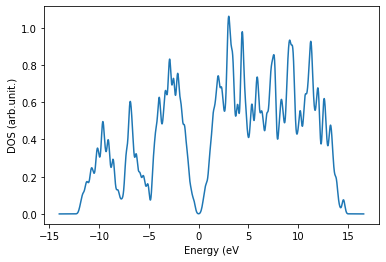

In [ ]:
# Get and plot electronic DOS from OptB88vdW after  SCF
edos_data = w.get_dft_electron_dos()
ens = np.array(edos_data['edos_energies'].strip("'").split(','),dtype='float')
tot_dos_up = np.array(edos_data['total_edos_up'].strip("'").split(','),dtype='float') 
plt.plot(ens,tot_dos_up)
plt.xlabel('Energy (eV')
plt.ylabel('DOS (arb.unit.)')

In [ ]:
mbj_dl= w.get_dft_mbj_dielectric_function()

Text(0, 0.5, 'Real part Eps-x')

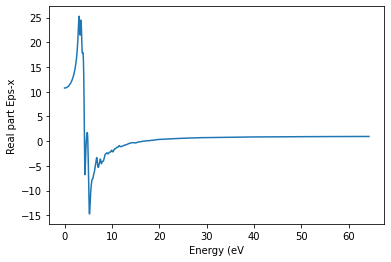

In [ ]:

plt.plot(mbj_dl['energies'],mbj_dl['real_xx'])
plt.xlabel('Energy (eV')
plt.ylabel('Real part Eps-x')

In [20]:
from jarvis.db.figshare import data,get_jid_data
import os,tempfile,io,zipfile
x = get_jid_data(jid='JVASP-1002',dataset='dft_3d')['raw_files']
print(x)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
['FD-ELAST,JVASP-1002.zip,https://ndownloader.figshare.com/files/22975514', 'DFPT,JVASP-1002.zip,https://ndownloader.figshare.com/files/22941809', 'OPT-LOPTICS,JVASP-1002.zip,https://ndownloader.figshare.com/files/24035894', 'OPT-Bandst,JVASP-1002.zip,https://ndownloader.figshare.com/files/23713301', 'TBMBJ,JVASP-1002.zip,https://ndownloader.figshare.com/files/23571836', 'DFT-SCF,JVASP-1002.zip,https://ndownloader.figshare.com/files/23127296', 'WANN,JVASP-1002.zip,https://ndownloader.figshare.com/files/23102750']


In [30]:
import requests
for i in x:
  if 'DFT-SCF' in i:
    print (i)
    r = requests.get(i.split(',')[2]).content
    
    

DFT-SCF,JVASP-1002.zip,https://ndownloader.figshare.com/files/23127296


In [31]:
z = zipfile.ZipFile(io.BytesIO(r))

In [32]:
z.namelist()

['INCAR', 'POSCAR', 'CONTCAR', 'OSZICAR', 'OUTCAR', 'vasprun.xml', 'KPOINTS']

In [38]:
from jarvis.io.vasp.inputs import Poscar
from jarvis.io.vasp.outputs import Vasprun
import tempfile

initial = Poscar.from_string(z.read('POSCAR').decode('utf-8'))
final = Poscar.from_string(z.read('POSCAR').decode('utf-8'))
fd, path = tempfile.mkstemp()
with os.fdopen(fd, "w") as tmp:
    tmp.write(z.read('vasprun.xml').decode('utf-8'))
vrun = Vasprun(path)

In [39]:
vrun.all_energies

array([-8.34009542, -8.33461345, -8.33806744, -8.33811601])

In [40]:
vrun.all_forces

array([[[ 0., -0., -0.],
        [-0.,  0.,  0.]],

       [[ 0.,  0., -0.],
        [-0., -0.,  0.]],

       [[ 0., -0.,  0.],
        [-0.,  0., -0.]],

       [[ 0.,  0., -0.],
        [-0., -0.,  0.]]])

In [41]:
vrun.get_indir_gap

(0.7313000000000001, 5.4591, 6.1904)